<img src="fireblaze.jpg" width=250 height=200 />

* The decision tree is a technique for supervised learning that is applied both to classification problems and regression problems

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#EDA

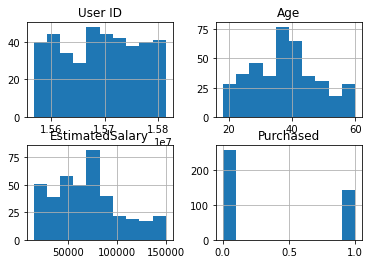

In [6]:
df.hist()
plt.show()

In [7]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
#splitting

X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
X_train = sc.fit_transform(X_train)

In [14]:
X_test = sc.fit_transform(X_test)

In [15]:
X_train.shape

(300, 2)

In [16]:
X_test.shape

(100, 2)

In [17]:
y_train.shape

(300,)

In [18]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [20]:
classifier = DecisionTreeClassifier(max_depth=4)

In [21]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [22]:
from sklearn import tree

In [23]:
repres = tree.export_text(classifier)

In [24]:
print(repres)

|--- feature_0 <= 0.48
|   |--- feature_1 <= 0.66
|   |   |--- feature_0 <= 0.38
|   |   |   |--- feature_0 <= 0.19
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.19
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  0.38
|   |   |   |--- feature_1 <= 0.07
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.07
|   |   |   |   |--- class: 1
|   |--- feature_1 >  0.66
|   |   |--- feature_0 <= -0.30
|   |   |   |--- feature_1 <= 1.49
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  1.49
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  -0.30
|   |   |   |--- class: 1
|--- feature_0 >  0.48
|   |--- feature_0 <= 1.35
|   |   |--- feature_1 <= -0.95
|   |   |   |--- feature_1 <= -1.40
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -1.40
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.95
|   |   |   |--- feature_1 <= 0.43
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.43
|   |   |   |   |--- class: 1
|   |

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, y_pred)

0.85

In [28]:
from sklearn.metrics import classification_report

In [29]:
print('classification_report:-\n', classification_report(y_test, y_pred))

classification_report:-
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        60
           1       0.82      0.82      0.82        40

    accuracy                           0.86       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.86      0.86      0.86       100



In [30]:
from sklearn.preprocessing import OneHotEncoder


In [31]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['Gender']]).toarray())

# merge with main df bridge_df on key values
df = df.join(enc_df)
df

,User ID,Gender,Age,EstimatedSalary,Purchased,0,1
0,15624510,Male,19,19000,0,0.0,1.0
1,15810944,Male,35,20000,0,0.0,1.0
2,15668575,Female,26,43000,0,1.0,0.0
3,15603246,Female,27,57000,0,1.0,0.0
4,15804002,Male,19,76000,0,0.0,1.0
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1.0,0.0
396,15706071,Male,51,23000,1,0.0,1.0
397,15654296,Female,50,20000,1,1.0,0.0
398,15755018,Male,36,33000,0,0.0,1.0


1. print text representation of the tree with **sklearn.tree.export_text method**

2. plot with **sklearn.tree.plot_tree** method (matplotlib needed)

3. plot with **sklearn.tree.export_graphviz** method (graphviz needed)

4. plot with dtreeviz package (dtreeviz and graphviz needed)

In [32]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [33]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= 0.68
|   |--- feature_1 <= 0.57
|   |   |--- feature_1 <= -0.02
|   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.02
|   |   |   |--- feature_0 <= -0.16
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.16
|   |   |   |   |--- class: 0
|   |--- feature_1 >  0.57
|   |   |--- feature_0 <= -1.14
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.14
|   |   |   |--- feature_1 <= 1.37
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.37
|   |   |   |   |--- class: 1
|--- feature_0 >  0.68
|   |--- feature_0 <= 1.47
|   |   |--- feature_1 <= -0.83
|   |   |   |--- feature_1 <= -1.41
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -1.41
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.83
|   |   |   |--- feature_1 <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.44
|   |   |   |   |--- class: 1
|   |--- feature_0 >  1.47
|   |   |--- feature_0 <= 2.06
|   |   |   |--- class: 1
|   |   |--- feature_

In [34]:
# save it to the file, it can be done with following code:

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

## Plot Tree with plot_tree

In [35]:
feature_names = ['User ID', 'Gender', 'Age', 'EstimatedSalary']
target_names = ['Purchased']

In [36]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,0,1
0,15624510,Male,19,19000,0,0.0,1.0
1,15810944,Male,35,20000,0,0.0,1.0
2,15668575,Female,26,43000,0,1.0,0.0
3,15603246,Female,27,57000,0,1.0,0.0
4,15804002,Male,19,76000,0,0.0,1.0


In [37]:
feature_names = df.columns[:4]
target_names = df['Gender'].unique().tolist()

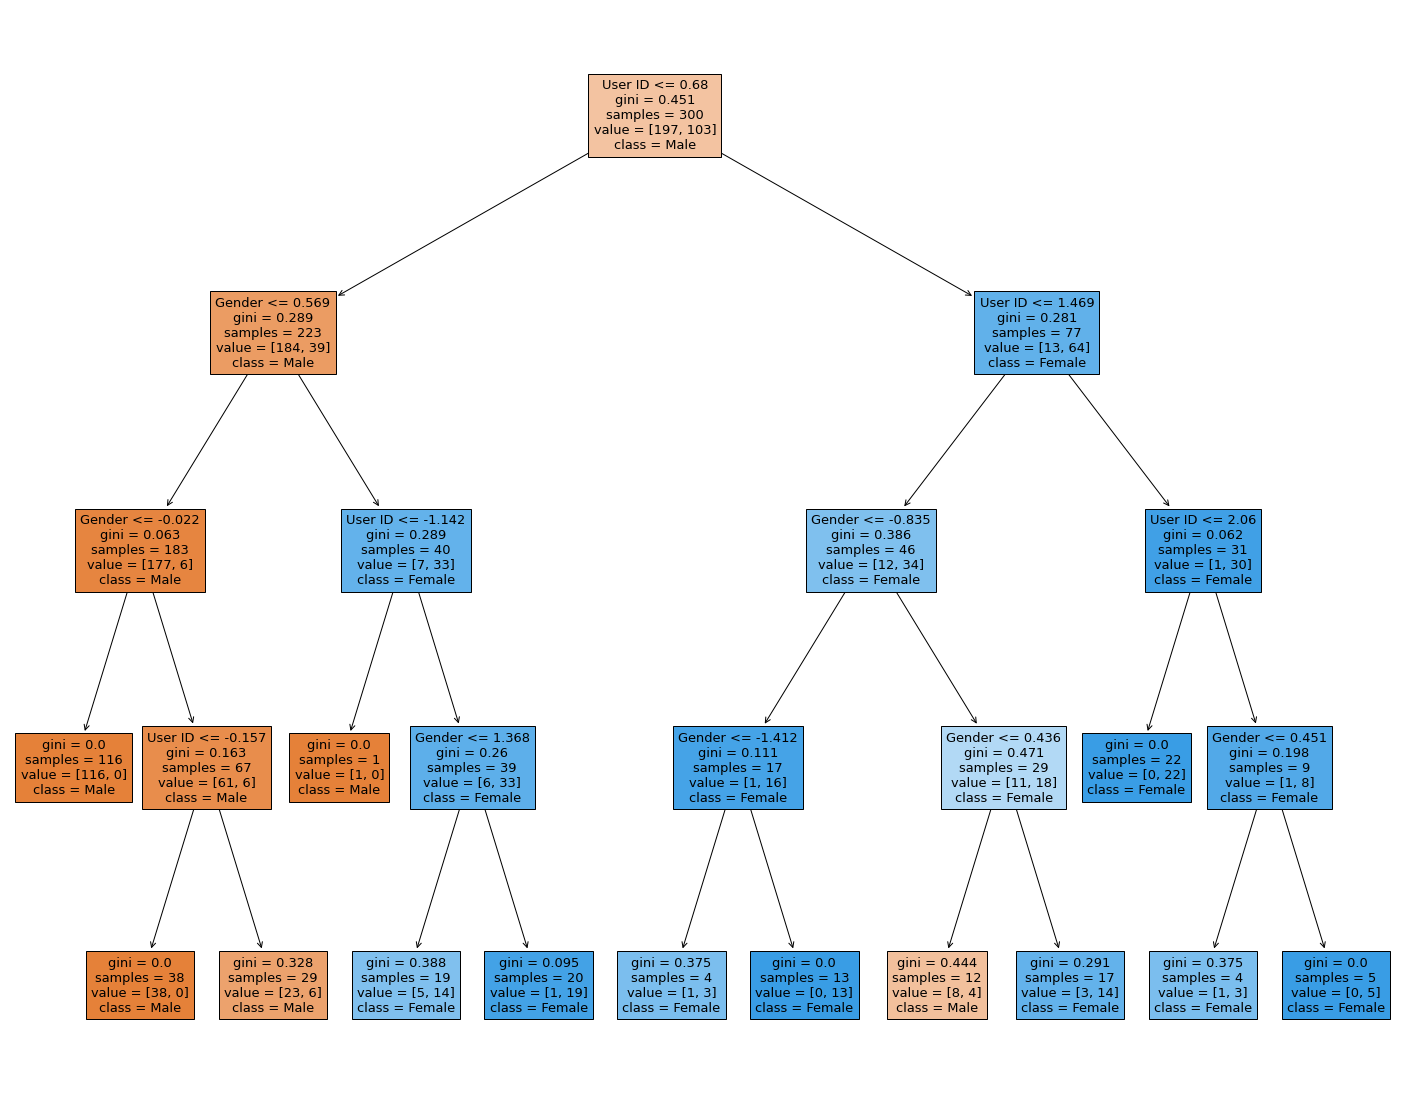

In [38]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

# Visualize Decision Tree with graphviz

In [40]:
!pip install graphviz
import graphviz

In [41]:
feature_names = df.columns[5:]
target_names = df['Gender'].unique().tolist()

In [47]:
# DOT data
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=feature_names,  
                                class_names=target_names,
                                filled=True,
                               rounded=True)


In [48]:
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [44]:
graph.render("decision_tree_graphivz")


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [72]:
#!pip install dtreeviz

In [81]:
from dtreeviz.trees import dtreeviz # remember to load the package


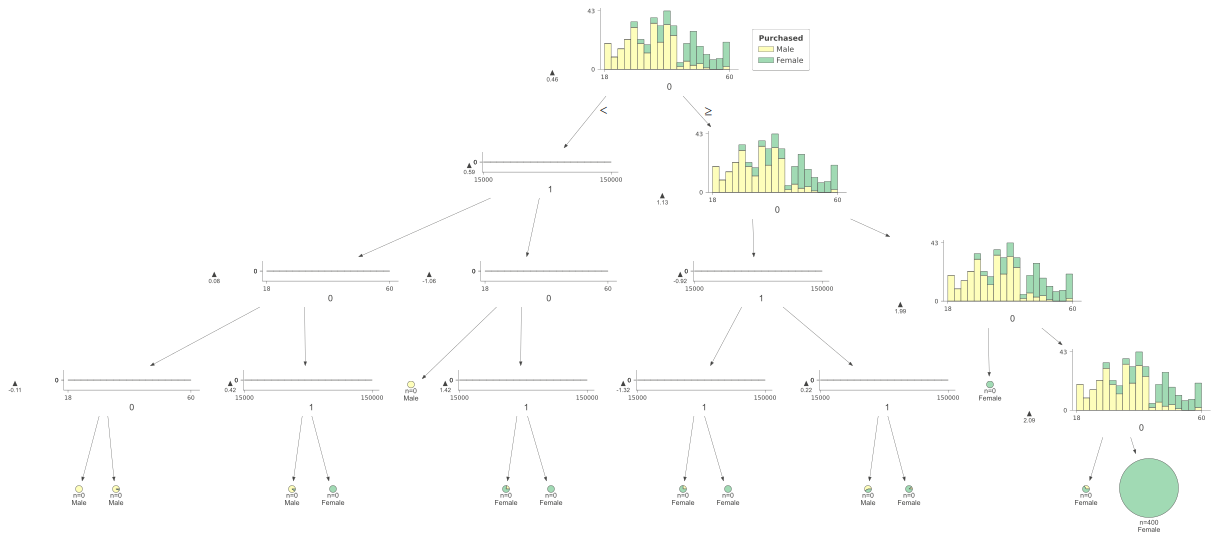

<Figure size 576x576 with 0 Axes>

In [77]:
plt.figure(figsize=(8,8))

viz = dtreeviz(classifier, X, y,
                target_name="Purchased",
                feature_names=feature_names,
                class_names=list(target_names))

viz

In [76]:
viz.save("decision_tree.svg")


In [85]:
#tree.dtreeviz.trees(classifier, show_just_path=True, X = df[features].iloc[5])

In [ ]:
import os
os.environ['PATH'] += os.pathsep + 'place where your graphviz is installed for example C:\user\Graphviz-2.38\release\bin'